In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error

In [2]:
# read in pickled features
df_sj = pd.read_pickle('./datasets/all_sj.pkl')
df_iq = pd.read_pickle('./datasets/all_iq.pkl')

In [3]:
total_cases = pd.read_csv('./datasets/dengue_labels_train.csv')

In [4]:
cases_sj = total_cases[total_cases['city'] == 'sj']['total_cases']
cases_iq = total_cases[total_cases['city'] == 'iq']['total_cases']

In [5]:
# create month variable
df_sj['month'] = df_sj.index.month
df_iq['month'] = df_iq.index.month

#all the dataset is loaded at once to improve the mean below.
# create mean ndvi
df_sj['ndvi_mean'] = (df_sj['ndvi_ne'] + df_sj['ndvi_nw'] + df_sj['ndvi_se'] + df_sj['ndvi_sw']) / 4.0

df_iq['ndvi_mean'] = (df_iq['ndvi_ne'] + df_iq['ndvi_nw'] + df_iq['ndvi_se'] + df_iq['ndvi_sw']) / 4.0
Xtrain_means1 = df_sj['station_avg_temp_c'].rolling(window = 52).mean()[52:936]
Xtrain_means2 = df_sj['reanalysis_specific_humidity_g_per_kg'].rolling(window = 52).mean()[52:936]
Xtrain_means3 = df_sj['reanalysis_dew_point_temp_k'].rolling(window = 52).mean()[52:936]
Xtrain_means4 = df_sj['reanalysis_max_air_temp_k'].rolling(window = 25).mean()[52:936]
Xtrain_means5 = df_sj['station_max_temp_c'].rolling(window = 25).mean()[52:936]
Xtrain_means6 = df_sj['reanalysis_min_air_temp_k'].rolling(window = 25).mean()[52:936]


In [6]:
# get monthly trend of whole test df
lr_sj_month = LinearRegression()
X_months = pd.get_dummies(df_sj['month'], prefix='month')[52:936]
X_months = pd.concat([X_months], axis = 1)

In [7]:
Xtest_months = pd.get_dummies(df_sj['month'], prefix='month')[936:]
Xtest_means1 = df_sj['station_avg_temp_c'].rolling(window = 52).mean()[936:]
Xtest_means2 = df_sj['reanalysis_specific_humidity_g_per_kg'].rolling(window = 52).mean()[936:]
Xtest_means3 = df_sj['reanalysis_dew_point_temp_k'].rolling(window = 52).mean()[936:]
Xtest_means4 = df_sj['reanalysis_max_air_temp_k'].rolling(window = 25).mean()[936:]
Xtest_means5 = df_sj['station_max_temp_c'].rolling(window = 52).mean()[936:]
Xtest_means6 = df_sj['reanalysis_min_air_temp_k'].rolling(window = 25).mean()[936:]
Xtest_months = pd.concat([Xtest_months], axis = 1)


In [8]:
y = cases_sj.values

lr_sj_month.fit(X_months, y)
monthly_trend = pd.Series(lr_sj_month.predict(X_months)).rolling(3, min_periods=1).mean()

ValueError: Found input variables with inconsistent numbers of samples: [884, 936]

In [185]:
sj_residuals_all = y - monthly_trend

In [186]:

#print(Xtrain_means2)

# create test df of rolling weather stats
# rolling means df

In [187]:
# combine all dfs

In [188]:
scaler = StandardScaler()
#Xtrain[Xtrain.columns] = scaler.fit_transform(Xtrain)

In [189]:
ytrain = sj_residuals_all
Xtrain = pd.concat([Xtrain_means1,Xtrain_means2,Xtrain_means3,Xtrain_means4], axis = 1)
Xtest_weather = pd.concat([Xtest_means1,Xtest_means2,Xtest_means3,Xtest_means4], axis = 1)


In [190]:
# combine all dfs


#Xtest_weather[Xtest_weather.columns] = scaler.fit_transform(Xtest_weather)


In [191]:
# fit on model
lr_sj_resid = LinearRegression()
lr_sj_resid.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [192]:
# make predictions on monthly data and residual data
sj_monthly_preds = pd.Series(lr_sj_month.predict(Xtest_months)).rolling(3, min_periods=1).mean()

In [193]:
sj_resid_preds = lr_sj_resid.predict(Xtest_weather)

In [194]:
sj_cases_pred = pd.Series(sj_resid_preds + sj_monthly_preds).rolling(1, min_periods=1).mean()
sj_cases_pred = sj_cases_pred.apply(lambda x: 0 if x < 1 else int(x))

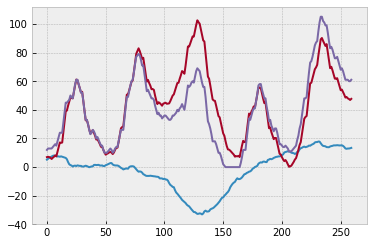

In [195]:
plt.plot(sj_resid_preds)
plt.plot(sj_monthly_preds)
plt.plot(sj_cases_pred)

In [196]:
# get monthly trend of whole test df
lr_iq_month = LinearRegression()
X_months = pd.get_dummies(df_iq['month'], prefix='month')[52:520]
Xtrain_means1 = df_iq['reanalysis_specific_humidity_g_per_kg'].rolling(window = 52).mean()[52:520]
Xtrain_means2 = df_iq['reanalysis_dew_point_temp_k'].rolling(window = 52).mean()[52:520]
Xtrain_means3 = df_iq['reanalysis_min_air_temp_k'].rolling(window = 52).mean()[52:520]
Xtrain_means4 = df_iq['reanalysis_relative_humidity_percent'].rolling(window = 52).mean()[52:520]
Xtrain_means5 = df_iq['reanalysis_tdtr_k'].rolling(window = 52).mean()[52:520]
X_months = pd.concat([X_months], axis = 1)

In [197]:
Xtest_months = pd.get_dummies(df_iq['month'], prefix='month')[520:]
# create test df on rolling weather stats
# rolling means df
#Xtest_means1 = df_iq['station_avg_temp_c'].rolling(window = 52).mean()[520:]
Xtest_means1 = df_iq['reanalysis_specific_humidity_g_per_kg'].rolling(window =52).mean()[520:]
Xtest_means2 = df_iq['reanalysis_dew_point_temp_k'].rolling(window =52).mean()[520:]
Xtest_means3 = df_iq['reanalysis_min_air_temp_k'].rolling(window =52).mean()[520:]
Xtest_means4 = df_iq['reanalysis_relative_humidity_percent'].rolling(window =52).mean()[520:]
Xtest_means5 = df_iq['reanalysis_tdtr_k'].rolling(window =52).mean()[520:]
#Xtest_means4 = df_iq['reanalysis_max_air_temp_k'].rolling(window =52).mean()[520:]
#Xtest_means5 = df_iq['station_max_temp_c'].rolling(window = 52).mean()[520:]
# combine all dfs
Xtest_months = pd.concat([Xtest_months], axis = 1)
#Xtest_weather[Xtest_weather.columns] = scaler.fit_transform(Xtest_weather)

In [198]:
y = cases_iq.values
y = y[52:]

lr_iq_month.fit(X_months, y)
monthly_trend = pd.Series(lr_iq_month.predict(X_months)).rolling(8, min_periods=1).mean()
iq_residuals_all = y - monthly_trend

In [199]:
# create test df of rolling weather stats
# rolling means df
#Xtrain_means1 = df_iq['station_avg_temp_c'].rolling(window = 52).mean()[52:520]

#Xtrain_means4 = df_iq['reanalysis_max_air_temp_k'].rolling(window = 52).mean()[52:520]
#Xtrain_means5 = df_iq['station_max_temp_c'].rolling(window = 52).mean()[52:520]

# combine all dfs


#Xtrain[Xtrain.columns] = scaler.fit_transform(Xtrain)

ytrain = iq_residuals_all

In [200]:
# fit on model
Xtrain = pd.concat([Xtrain_means1,Xtrain_means2,Xtrain_means3], axis = 1)
lr_iq_resid = LinearRegression()
lr_iq_resid.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [201]:
Xtest_weather = pd.concat([Xtest_means1,Xtest_means2,Xtest_means3], axis = 1)

In [202]:
# make predictions on monthly data and residual data
iq_monthly_preds = pd.Series(lr_iq_month.predict(Xtest_months)).rolling(8, min_periods=1).mean()
iq_resid_preds = lr_iq_resid.predict(Xtest_weather)
iq_cases_pred = pd.Series(iq_monthly_preds + iq_resid_preds)
iq_cases_pred = iq_cases_pred.apply(lambda x: 0 if x < 2 else int(x))
iq_cases_pred = iq_cases_pred.apply(lambda x: (x) if x > 30 else x)
iq_cases_pred = iq_cases_pred.apply(lambda x: (x) if x > 50 else x)
iq_cases_pred.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    2
16    3
17    3
18    4
19    4
dtype: int64

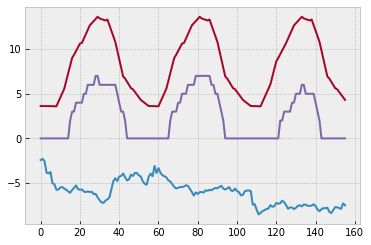

In [203]:
plt.plot(iq_resid_preds)
plt.plot(iq_monthly_preds)
plt.plot(iq_cases_pred)

In [204]:
total_preds = list(sj_cases_pred) + list(iq_cases_pred)

In [205]:
# submission
submission_format = pd.read_csv('./datasets/submission_format.csv')

In [206]:
submission_format['total_cases'] = total_preds

submission_format['total_cases'] = submission_format['total_cases'].apply(lambda x: int(x))
submission_format_only_cases = submission_format['total_cases']

In [207]:
# Save to CSV, use current date
submission_format.to_csv('submissions/try_choice23.csv', index=False)
submission_format_only_cases.to_csv('submissions/only_cases_27_1_05_18v2.csv', index=False)

In [208]:
submission_format.head(10)

,city,year,weekofyear,total_cases
0,sj,2008,18,12
1,sj,2008,19,13
2,sj,2008,20,13
3,sj,2008,21,13
4,sj,2008,22,13
5,sj,2008,23,14
6,sj,2008,24,15
7,sj,2008,25,16
8,sj,2008,26,15
9,sj,2008,27,18
